In [35]:
# importando bibliotecas

import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics

# importando a funcao de treino e teste
from sklearn.model_selection import train_test_split

In [36]:
# importando o mnist dataset

digits = datasets.load_digits()



In [37]:
# achatamento de imagem e transformando a matriz em vetor

n_sample = len(digits.images)
data = digits.images.reshape((n_sample, -1))

In [106]:
# classificador

clf = svm.SVC(gamma=0.001)


In [107]:
# dividindo a data em 80/20 treino teste

X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.2, shuffle=False)


In [108]:
# Treinamento do modelo

clf.fit(X_train, y_train)

SVC(gamma=0.001)

In [109]:
# prever o valor do digito no teste

predicted = clf.predict(X_test)

In [111]:
# prever a taxa de porcentagem de acerto

print(f'Relatorio de classificacao para o classificador {clf}:\n'
     f'{metrics.classification_report(y_test, predicted)}\n')

Relatorio de classificacao para o classificador SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        35
           1       0.97      1.00      0.99        36
           2       1.00      1.00      1.00        35
           3       0.97      0.81      0.88        37
           4       0.97      0.92      0.94        37
           5       0.93      1.00      0.96        37
           6       1.00      1.00      1.00        37
           7       0.97      1.00      0.99        36
           8       0.84      0.94      0.89        33
           9       0.95      0.95      0.95        37

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360




In [112]:
#Usando o random search para aprimorar o resultado do modelo

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

clf = RandomForestClassifier()
random_search = RandomizedSearchCV(clf, param_distributions=param_grid, n_iter=10)

random_search.fit(X_train, y_train)

print(random_search.best_params_)


{'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 10}


In [17]:
# Usando o grid search para escolher os melhores parametros

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

clf = RandomForestClassifier()
grid_search = GridSearchCV(clf, param_grid=param_grid)

grid_search.fit(X_train, y_train)

print(grid_search.best_params_)


{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


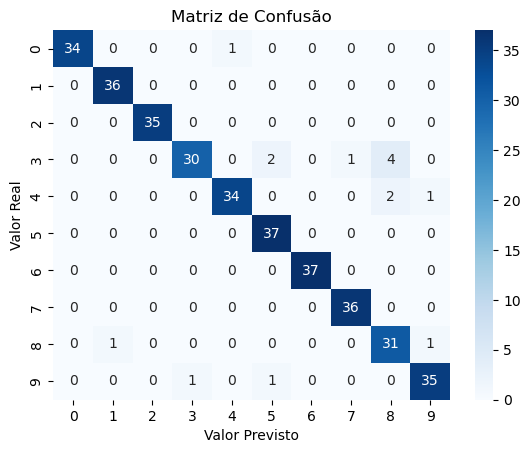

In [42]:

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Avaliando o modelo e calculando a matriz de confusão
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Plotando a matriz de confusão usando seaborn
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title('Matriz de Confusão')
plt.xlabel('Valor Previsto')
plt.ylabel('Valor Real')
plt.show()



In [44]:
# Usando Cross Validation

from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier

# Criando o classificador
clf = RandomForestClassifier()

# Definindo os dados de entrada X e os rótulos y

# Criando o objeto KFold para k=5
kfold = KFold(n_splits=5)

# Realizando a validação cruzada
scores = cross_val_score(clf, X_train, y_train, cv=kfold)

# Imprimindo os resultados
print("Acurácia média:", scores.mean())
print("Desvio padrão:", scores.std())


Acurácia média: 0.945034843205575
Desvio padrão: 0.014775168214957692


# exercicio 02

In [113]:
# Calculando a acuracia

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, predicted)
print(f'Acurácia: {accuracy}')


Acurácia: 0.9583333333333334


1 - Qual a acurácia do modelo e justifique:

- A acuracia do modelo pode variar conforme a divisao da porcentagem de treino e teste, mas nesse caso do exercicio proposto a acuracia do modelo e de aprox 0.95% o que pode ser considerada alta, isso por que o modelo esta usando o algoritimo SVM que e muito eficaz para classificar os dados manuscritos assim como o MNIST, mas alem da acuracia sempre deve se observar outras metricas tambem para melhor avaliar o modelo

2 - O modelo teve uma boa performance? Justifique:

- Com base na acuracia obtida podemos dizer que o modelo teve uma boa performance, pois alem da acuracia o modelo apresenta bons resultados no recal, f1 e precision assim no geral ele obteve um bom desempenho

3 - Quais foram os melhores parâmetros escolhidos? Justifique:

- o parâmetro gamma foi definido como 0.001 para o classificador SVC. A escolha do valor 0.001 foi determinada por experimentação mas podendo ser tambem determinada por otimizacao de hiperparametros, os melhores parâmetros podem variar dependendo do conjunto de dados e do problema específico. Em algumas situações, pode ser necessário realizar uma busca de hiperparâmetros mais abrangente para determinar os valores ótimos.

4 - Quais são as principais dificuldades encontradas para o modelo de criação? Alguma delas: 

- Dificuldade na pré-processamento dos dados: O conjunto de dados MNIST é relativamente limpo e bem estruturado, mas em problemas reais de classificação de dígitos manuscritos, a qualidade e a variação dos dados podem apresentar desafios adicionais.

- Dificuldade em lidar com classes desbalanceadas: Se o conjunto de dados tiver classes desbalanceadas, ou seja, algumas classes têm muito mais instâncias do que outras, o modelo pode ter dificuldade em realizar previsões precisas para as classes minoritárias.

- Dificuldade em ajustar os hiperparâmetros: A escolha adequada dos hiperparâmetros do modelo pode ser um desafio. Diferentes valores de hiperparâmetros podem levar a resultados significativamente diferentes.

- Overfitting e Underfitting: Em alguns casos, o modelo pode se ajustar muito bem ou muito mal aos dados de treinamento. Isso pode ocorrer quando o modelo é muito ou pouco complexo em relação ao tamanho e à qualidade dos dados de treinamento disponíveis

# Exercicio 03


1- A diferença entre um parâmetro de modelo e um hiperparâmetro de algoritmo de aprendizado é a seguinte:

- Parâmetro de modelo: São os valores internos do modelo que são ajustados durante o processo de treinamento. Por exemplo, no caso de um modelo de regressão linear, os coeficientes da equação linear são os parâmetros que são otimizados durante o treinamento.

- Hiperparâmetro de algoritmo de aprendizado: São os valores que controlam o comportamento e a configuração do algoritmo de aprendizado, mas não são ajustados diretamente durante o treinamento do modelo. Esses hiperparâmetros são definidos antes do treinamento e afetam a performance e a capacidade de generalização do modelo. Exemplos de hiperparâmetros incluem o número de camadas em uma rede neural, a taxa de aprendizado em um algoritmo de otimização, entre outros.

2 - Quatro dos principais desafios relacionados ao machine learning são:

- Dados insuficientes ou de baixa qualidade: O desafio de obter dados suficientes e de boa qualidade para treinar um modelo é comum. A qualidade e a quantidade dos dados têm um impacto significativo no desempenho do modelo.

- Overfitting e underfitting: O overfitting ocorre quando o modelo se ajusta muito bem aos dados de treinamento, mas não generaliza bem para novos dados. O underfitting, por outro lado, ocorre quando o modelo é muito simples e não consegue capturar padrões complexos nos dados. Encontrar um equilíbrio entre esses dois extremos é um desafio.

- Seleção de recursos relevantes: A seleção de recursos relevantes é crucial para um bom desempenho do modelo. Identificar quais recursos são mais informativos e relevantes para o problema em questão pode ser desafiador, especialmente em conjuntos de dados com muitos recursos.

- Interpretabilidade do modelo: Em muitos casos, é importante que o modelo seja interpretável, ou seja, que possamos entender e explicar as decisões tomadas pelo modelo. Modelos complexos, como redes neurais profundas, podem ser mais difíceis de interpretar do que modelos mais simples, como regressão linear.

3 -Se o modelo tem um ótimo desempenho nos dados de treinamento, mas generaliza mal para novas instâncias, isso indica que ocorreu overfitting. Algumas soluções possíveis para lidar com o overfitting são:

- Regularização: Adicionar termos de regularização à função de custo pode ajudar a evitar o overfitting, penalizando os pesos excessivamente grandes do modelo.

- Aumentar o tamanho do conjunto de treinamento: Adquirir mais dados pode fornecer uma visão mais representativa do problema e reduzir o overfitting.

- Simplificar o modelo: Reduzir a complexidade do modelo, diminuindo o número de parâmetros ou limitando a capacidade do modelo, pode ajudar a evitar o overfitting.

4 -Um conjunto de testes é um conjunto de dados separado usado para avaliar o desempenho final do modelo. 

- É importante utilizar um conjunto de testes separado para verificar como o modelo generaliza para novos dados, ou seja, dados que não foram vistos durante o treinamento. O conjunto de testes fornece uma estimativa imparcial do desempenho do modelo e ajuda a avaliar sua capacidade de generalização.

5 - O propósito de um conjunto de validação é auxiliar no ajuste de hiperparâmetros e na seleção do melhor modelo. 

- Durante o treinamento, um conjunto de validação é usado para avaliar o desempenho do modelo em dados não vistos e, assim, ajustar os hiperparâmetros do modelo. O conjunto de validação ajuda a evitar o ajuste excessivo aos dados de treinamento e a selecionar o modelo que melhor generaliza para dados não vistos.

6 - Se você ajustar os hiperparâmetros usando o conjunto de teste, corre o risco de superestimar o desempenho do modelo. 

- Isso ocorre porque o modelo terá informações sobre os dados de teste durante o ajuste dos hiperparâmetros, o que pode levar a uma otimização excessiva para esse conjunto de dados específico. O resultado é que o modelo pode não generalizar bem para novos dados. Para evitar esse problema, é necessário separar um conjunto de validação para ajustar os hiperparâmetros e deixar o conjunto de teste reservado apenas para a avaliação final do modelo após o ajuste dos hiperparâmetros.